This notebook focuses on using Meta's Prophet to make a time series forecast. 
The data is a 2 by 325 dataframe containing a column of sales with the date (month) of sales. The date spans from Jan 1992 to Jan 2019.

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
a_sales = pd.read_csv(r'C:\Users\hp\Documents\Datasets\Alcohol_Sales.csv')

In [129]:
a_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            325 non-null    object
 1   S4248SM144NCEN  325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [130]:
a_sales.duplicated().sum()

0

In [131]:
a_sales.isna().sum()

DATE              0
S4248SM144NCEN    0
dtype: int64

In [132]:
a_sales.head(12)

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
5,1992-06-01,4529
6,1992-07-01,4466
7,1992-08-01,4137
8,1992-09-01,4126
9,1992-10-01,4259


In [133]:
a_sales.tail(12)

,DATE,S4248SM144NCEN
313,2018-02-01,10415
314,2018-03-01,12683
315,2018-04-01,11919
316,2018-05-01,14138
317,2018-06-01,14583
318,2018-07-01,12640
319,2018-08-01,14257
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174


In [134]:
a_sales = a_sales.iloc[:324] # to eliminate Jan 2019
a_sales.tail(12)

,DATE,S4248SM144NCEN
312,2018-01-01,9564
313,2018-02-01,10415
314,2018-03-01,12683
315,2018-04-01,11919
316,2018-05-01,14138
317,2018-06-01,14583
318,2018-07-01,12640
319,2018-08-01,14257
320,2018-09-01,12396
321,2018-10-01,13914


In [135]:
# Prophet reads only 'ds' and 'y', interpreteing noth for data and datapoint respectively, so i rename the columns to 'ds' and y'
a_sales = a_sales.rename(columns = {'DATE': 'ds', 'S4248SM144NCEN': 'y'})

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='y', ylabel='Count'>

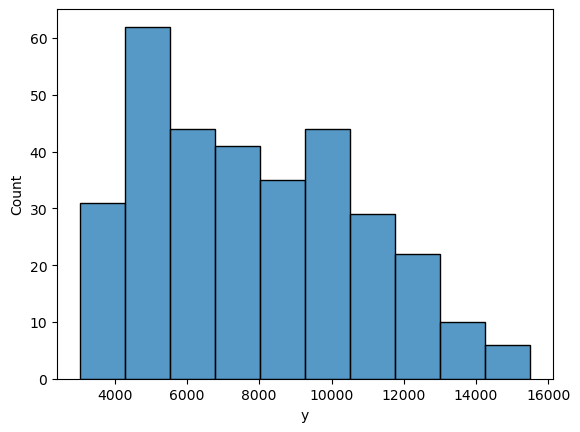

In [136]:
sns.histplot(a_sales['y'])

In [155]:
from prophet import Prophet

model = Prophet()
model.fit(a_sales)

future = model.make_future_dataframe(periods=156, freq='MS') # 'MS' to make Prophet use start of months as freuqency, and #156 to forcast for 156 months
forecast = model.predict(future)

12:15:55 - cmdstanpy - INFO - Chain [1] start processing
12:15:55 - cmdstanpy - INFO - Chain [1] done processing


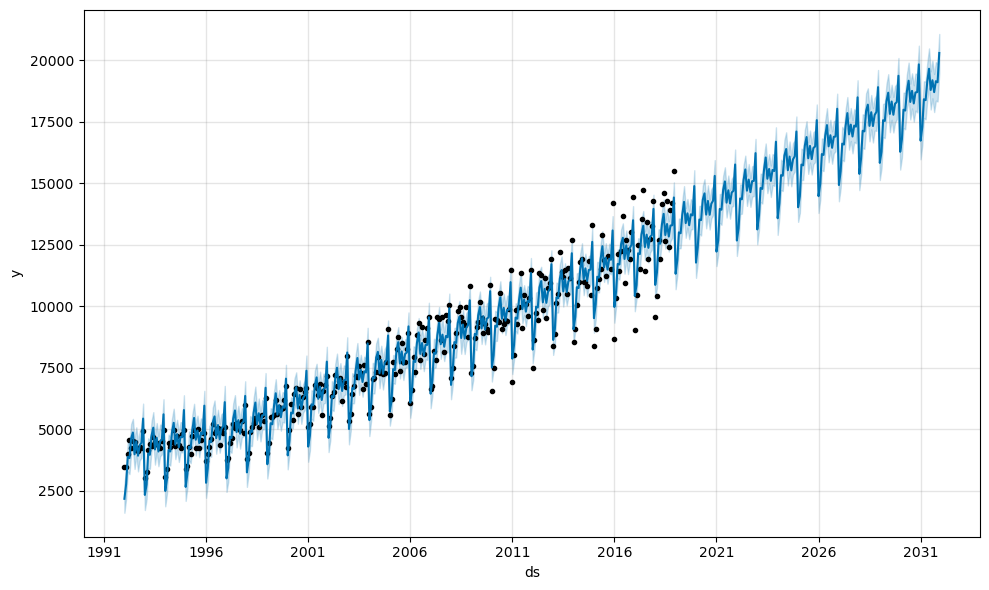

In [157]:
model.plot(forecast)
plt.show()

In [159]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,4003.272336,1600.601859,2772.435854,4003.272336,4003.272336,-1834.031516,-1834.031516,-1834.031516,-1834.031516,-1834.031516,-1834.031516,0.0,0.0,0.0,2169.240820
1,1992-02-01,4017.015318,2166.778517,3351.721261,4017.015318,4017.015318,-1253.055705,-1253.055705,-1253.055705,-1253.055705,-1253.055705,-1253.055705,0.0,0.0,0.0,2763.959613
2,1992-03-01,4029.871655,3273.178112,4494.175676,4029.871655,4029.871655,-155.203622,-155.203622,-155.203622,-155.203622,-155.203622,-155.203622,0.0,0.0,0.0,3874.668033
3,1992-04-01,4043.614637,3172.116733,4402.257311,4043.614637,4043.614637,-218.767105,-218.767105,-218.767105,-218.767105,-218.767105,-218.767105,0.0,0.0,0.0,3824.847532
4,1992-05-01,4056.914296,4033.822338,5212.207383,4056.914296,4056.914296,568.953940,568.953940,568.953940,568.953940,568.953940,568.953940,0.0,0.0,0.0,4625.868236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2031-08-01,18825.963316,18448.893654,19979.366427,18324.464957,19290.323094,356.509807,356.509807,356.509807,356.509807,356.509807,356.509807,0.0,0.0,0.0,19182.473122
476,2031-09-01,18864.233422,17888.884002,19436.179932,18356.649782,19332.436246,-164.288926,-164.288926,-164.288926,-164.288926,-164.288926,-164.288926,0.0,0.0,0.0,18699.944496
477,2031-10-01,18901.269008,18352.742630,19923.081282,18387.575836,19372.390523,241.825399,241.825399,241.825399,241.825399,241.825399,241.825399,0.0,0.0,0.0,19143.094407
478,2031-11-01,18939.539114,18319.820140,19858.324610,18422.081807,19414.047718,161.493790,161.493790,161.493790,161.493790,161.493790,161.493790,0.0,0.0,0.0,19101.032904


## Conclusion 
The Prophet forecasting graph above provides a convincing picture of steady increase over time interrupted by a clear seasonal pattern. A significant core force pushing sales is suggested by the growth pattern seen across the historical data and projected into the future. It is necessary to look into the root cause of this steady growth pattern, which could be due to changes in consumer behaviour, market evolution, or technological advancements. The annual cycles, which repeat with repressive regularity, are an example of a predictable cycle that must be comprehended in order to plan and make provisions appropriately.

The forecast, however, is not entirely predictable. The inevitable inaccuracy of future projections is illustrated by the widening confidence limits, especially with longer time horizons. The notion that historical patterns will continue in the future is a strong one, even though the model fits the historical data well.